## EDA - Exploratory Data Analysis

Etapa en la que se llevara a cabo un análisis exhaustivo de los datos. Entre los aspectos destacados que se deben abordar en esta etapa se encuentran:

- La busqueda de valores faltantes.
- Tratamiento de valores faltantes.
- Valores atipicos/extremos o outliers.
- Registros duplicados.

#### Importación de librerias:

In [1]:
import pandas as pd
from io import BytesIO
import pyarrow.parquet as pq
import os
import matplotlib.pyplot as plt
import seaborn as sns
import Utilidades as ut

### Business 📊

*Dataset que contiene información del comercio, incluyendo localización, atributos y categorías.*

*Definimos la ruta del archivo :*

In [2]:
ruta = './Datos/Yelp/business.pkl' 

*Almacenamos el contenido del archivo en un DataFrame:*

In [3]:
with open(ruta, "rb") as file:
    df_business = pd.read_pickle(BytesIO(file.read()))

*Visualizamos el DataFrame:*

In [4]:
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Visualizamos la información general del DataFrame (nombres de las columnas, valores **non-null** y tipo de dato por columna):*

In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

> *Podemos ver que las columnas del DataFrame estan duplicadas, y podemos ver que esas columnas duplicadas poseen un número muy bajo de valores **non-null**.*

*Procedemos a eliminar esas columnas, ya que no aportan nada relevante:*

In [6]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

*Analizamos el porcentaje de valores nulos:*

In [7]:
ut.porcentaje_valores_nulos(df_business)

La columna business_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna city tiene un  0.00 % de valores nulos
La columna state tiene un  0.00 % de valores nulos
La columna postal_code tiene un  0.00 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna review_count tiene un  0.00 % de valores nulos
La columna is_open tiene un  0.00 % de valores nulos
La columna attributes tiene un  9.14 % de valores nulos
La columna categories tiene un  0.07 % de valores nulos
La columna hours tiene un  15.45 % de valores nulos


> *Podemos observar que la gran mayoria de las columnas no poseen valores nulos, y las que si poseen, representan un porcentaje muy bajo.*

*Antes de seguir con el análisis estadistico del DataFrame, guardaremos el archivo en formato **.parquet**, para que al ejecutar operaciones sobre el, sea de manera más optimizada:*

In [8]:
df_business.to_parquet('./Datos/Yelp/business.parquet')

*Abrimos el archivo, pero en formato **.parquet**:*

In [9]:
df_business = pq.read_table('./Datos/Yelp/business.parquet').to_pandas()

*Analizamos las estadisticas descriptivas de todo el DataFrame, y veremos que información relevante podemos obtener a partir de allí:*

In [10]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


> *Basándonos en las estadísticas descriptivas de las variables relacionadas con la ubicación, calificación, cantidad de reseñas y estado de apertura de los negocios, podemos concluir que la mayoría de los comercios tienen una calificación promedio de aproximadamente 3.60, la cantidad promedio de reseñas por comercio es de aproximadamente 44.87 y la gran mayoría de los negocios (aproximadamente el 75%) están abiertos, lo que indica una actividad comercial activa.*

*Analizamos los registros duplicados según **business_id**, ya que deberia haber un unico ID por comercio:*

In [11]:
df_business[df_business.duplicated(subset= ['business_id'])]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


> *Podemos ver que los comercios estan registrados correctamente, ya que no poseen IDs duplicados.*

***Top 5 comercios con mayor cantidad de sucursales:***

*Almacenamos en una variable el top 5 de comercios con mayor cantidad de sucursales:*

In [12]:
top_5_business = df_business['name'].value_counts().head()

top_5_business

name
Starbucks     724
McDonald's    703
Dunkin'       510
Subway        459
Taco Bell     365
Name: count, dtype: int64

*Graficamos:*

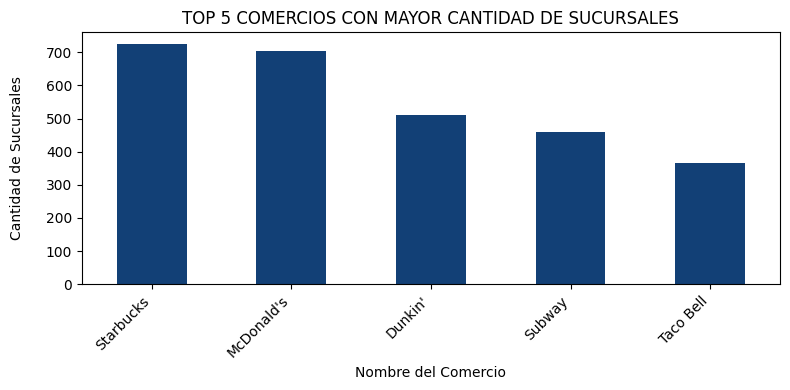

In [13]:
plt.figure(figsize=(8, 4))

top_5_business.plot(kind='bar', color='#124076')

plt.title('TOP 5 COMERCIOS CON MAYOR CANTIDAD DE SUCURSALES')

plt.xlabel('Nombre del Comercio')
plt.ylabel('Cantidad de Sucursales\n')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

> *Estos cinco comercios representan una proporción significativa del total de negocios. Esto sugiere que hay una concentración de ciertos tipos de comercios en el mercado, lo que puede deberse a la popularidad o demanda de estos servicios entre los consumidores. Podemos ver que el comercio con mayor cantidad de sucursales es Starbucks. Y en segundo lugar, se encuentra posicionado el comercio de nuestro interes, McDonald's, con 703 sucursales.*

***Top 5 ciudades con mayor cantidad de comercios:***

*Almacenamos en una variable, el top 5 de ciudades con mayor cantidad de comercios:*

In [14]:
top_5_ciudades = df_business['city'].value_counts().head()

top_5_ciudades

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
Name: count, dtype: int64

*Graficamos:*

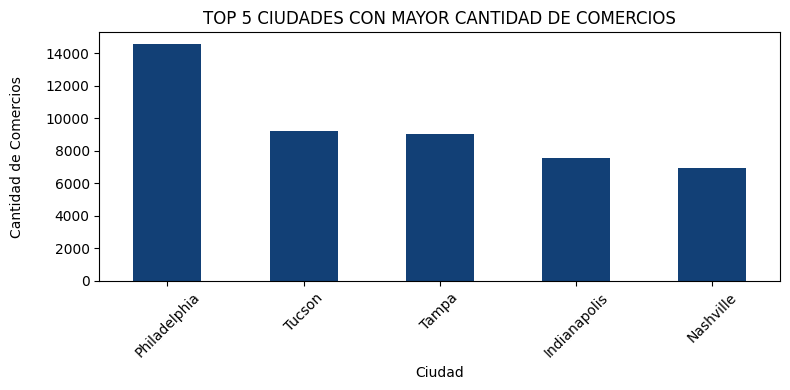

In [15]:
plt.figure(figsize=(8, 4))

top_5_ciudades.plot(kind='bar', color='#124076')

plt.title('TOP 5 CIUDADES CON MAYOR CANTIDAD DE COMERCIOS')

plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Comercios\n')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

> *El análisis revela que Philadelphia es la ciudad con mayor cantidad de comercios, superando notablemente a otras ciudades en cantidad. En segundo y tercer lugar se encuentran Tucson y Tampa, respectivamente, con una diferencia de aproximadamente 200 locales entre ellas.* 

***Top 5 estados con mayor cantidad de comercios:***

*Almacenamos en una variable, el top 5 de estados con mayor cantidad de comercios:*

In [16]:
top_5_estados = df_business['state'].value_counts().head()

top_5_estados

state
PA    34039
FL    26329
TN    12056
IN    11246
MO    10913
Name: count, dtype: int64

*Graficamos:*

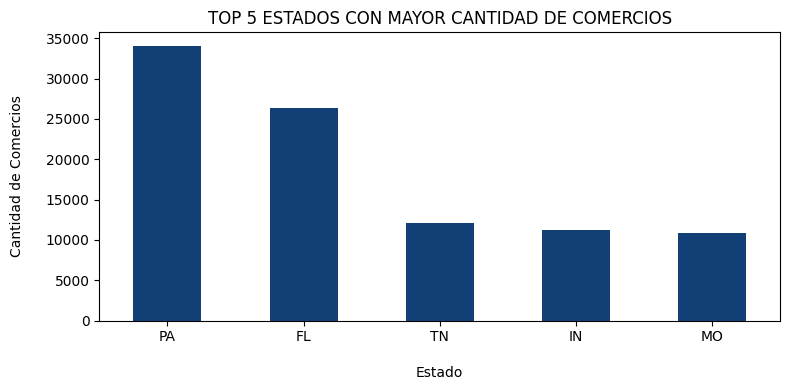

In [17]:
plt.figure(figsize=(8, 4))

top_5_estados.plot(kind='bar', color='#124076')

plt.title('TOP 5 ESTADOS CON MAYOR CANTIDAD DE COMERCIOS')

plt.xlabel('\nEstado')
plt.ylabel('Cantidad de Comercios\n')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

> *Superando la cantidad de comercios en otros estados de manera significativa, se encuentran en primer y segundo lugar, Pensilvania y Florida. Esto sugiere que estos estados tienen una mayor densidad comercial o una mayor concentración de comercios en comparación con otros estados. Esto puede ser util para identificar oportunidades de mercado en regiones especificas.*

***Distribución de comercios según categorias:***

*Analizamos la distribución de los comercios según la categoria:*

In [18]:
df_business['categories'].value_counts().head()

categories
Beauty & Spas, Nail Salons    1012
Restaurants, Pizza             935
Nail Salons, Beauty & Spas     934
Pizza, Restaurants             823
Restaurants, Mexican           728
Name: count, dtype: int64

> *Analizando a simple vista, podemos observar que en primer lugar, se posiciona la categoria **Beauty & Spas, Nail Salons** con mayor cantidad de comercios de este tipo, y en segundo lugar la categoria **Restaurants, Pizza**. Si analizaramos detalladamente todas las categorias, podriamos ver que los comercios, estan categorizados de distintas formas. Asique deberiamos evaluar cual es el ranking correcto agrupando las categorias según sus palabras claves.*

*Generamos un DataFrame auxiliar, donde agrupamos los comercios por las categorias más populares:*

In [19]:
df_agrupado = pd.DataFrame(df_business['categories'].apply(ut.agrupar_categorias).value_counts())

*Graficamos:*

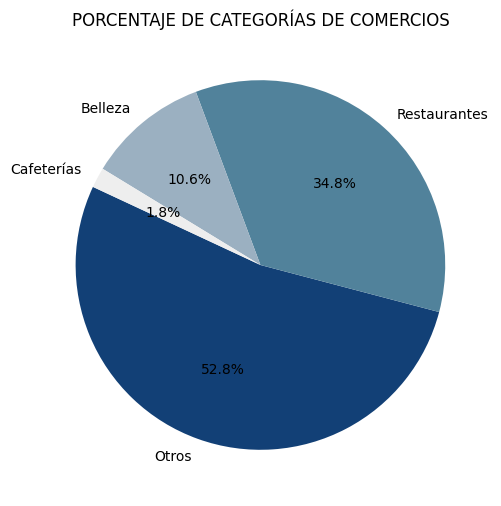

In [21]:
plt.figure(figsize=(6, 6))

plt.pie(df_agrupado['count'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=155, colors=['#124076', '#51829B', '#9BB0C1', '#EEEEEE'])

plt.title('PORCENTAJE DE CATEGORÍAS DE COMERCIOS')

plt.show()

> *Si nos hubiéramos guiado únicamente por el conteo de ocurrencias de las categorías, habría sido bastante confuso posicionar las categorías de los comercios. Sin embargo, al agruparlas, podemos ver que la categoría más predominante es "restaurant". Esto sugiere que la mayoría de los comercios en el conjunto de datos están relacionados con la industria de restaurantes, lo que puede ser un indicador importante para comprender la distribución y la naturaleza de los negocios en la muestra.*

***Cantidad de comercios por calificación:***

*Almacenamos en una variable, los comercios agrupados según calificación:*

In [22]:
star = df_business['stars'].value_counts().sort_index()

*Graficamos:*

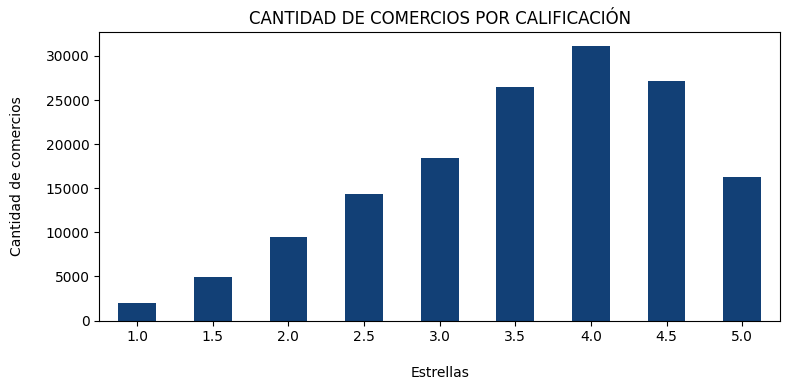

In [23]:
plt.figure(figsize=(8, 4))

star.plot(kind='bar', color='#124076')

plt.title('CANTIDAD DE COMERCIOS POR CALIFICACIÓN')

plt.xlabel('\nEstrellas')
plt.ylabel('Cantidad de comercios\n')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

> *La distribución de calificaciones de estrellas entre los comercios muestra que la mayoría de los negocios tienen calificaciones altas, con una cantidad significativa de negocios calificados con 4.0 y 4.5 estrellas. Esto sugiere que los usuarios tienden a calificar positivamente la mayoría de los comercios. Sin embargo, también hay una proporción menor de negocios con calificaciones más bajas, lo que indica que existen experiencias variadas entre los usuarios.*

***Top 5 comercios con mayor cantidad de reseñas:***

*Almacenamos en una variable, el top 5 de comercios con mayor cantidad de reseñas:*

In [27]:
top_5_comercios = df_business.groupby('name')['review_count'].sum().sort_values(ascending=False).head()

*Graficamos:*

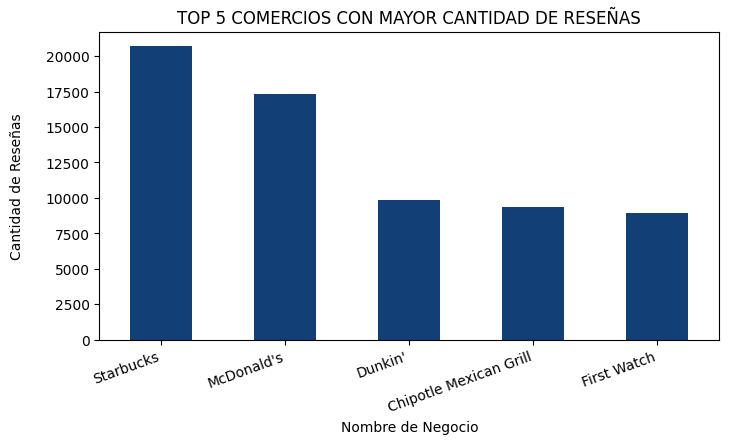

In [28]:
plt.figure(figsize=(8, 4))

top_5_comercios.plot(kind='bar', color='#124076')

plt.title('TOP 5 COMERCIOS CON MAYOR CANTIDAD DE RESEÑAS')

plt.xlabel('Nombre de Negocio')
plt.ylabel('Cantidad de Reseñas\n')

plt.xticks(rotation=20, ha='right')

plt.show()

> *Los comercios **Starbucks** y **McDonald's**, son los comercios con mayor cantidad de reseñas. Si bien esto podria asociarse a su popularidad y visibilidad en el mercado, también podria estar relacionado a la cantidad de sucursales que tienen cada uno de ellos.*

***Filtramos el DataFrame, quedandonos con los registros relacionados al comercio de nuestro interes, McDonald's:***

In [29]:
df_business_mc = df_business[df_business['name'].str.contains("McDonald's")]

In [30]:
df_business_mc['categories'].value_counts()

categories
Fast Food, Coffee & Tea, Burgers, Restaurants, Food                            16
Fast Food, Burgers, Coffee & Tea, Restaurants, Food                            12
Fast Food, Restaurants, Burgers, Coffee & Tea, Food                            12
Burgers, Restaurants, Coffee & Tea, Food, Fast Food                            12
Restaurants, Burgers, Fast Food, Food, Coffee & Tea                            11
                                                                               ..
Hot Dogs, Burgers, Food, Coffee & Tea, Fast Food, Restaurants                   1
Food, American (Traditional), Restaurants, Fast Food, Coffee & Tea, Burgers     1
Restaurants, Burgers, Food, Coffee & Tea, Hot Dogs, Fast Food                   1
Restaurants, Fast Food, Breakfast & Brunch, Burgers, Coffee & Tea, Food         1
Coffee & Tea, Food, Burgers, Fast Food, Restaurants, Sandwiches                 1
Name: count, Length: 167, dtype: int64

> *Podemos ver que el mismo comercio, tiene 167 categorias distintas. Si bien todas hacen referencia al mismo tipo de comercio, figuran escritas de distintas formas, con distintas palabras claves o en distinto orden; algo que se debera modificar posteriormente.*

In [31]:
df_business_mc['categories'].str.contains('Restaurants|Restaurant|restaurant|Fast Food|Food').sum()

703

> *Pudimos verificar que filtramos correctamente, corroborando que el comercio correspondiera a la categoria Restaurant, buscando palabras claves.*

*Guardamos el dataset filtrado para su posterior uso:*

In [79]:
df_business_mc.to_parquet('./Datos/Archivos Filtrados/business_mcdonalds.parquet')

***Análisis exhaustivo del DataFrame filtrado (McDonald's):***

*Resumen estadistico del DataFrame filtrado, tanto de variables numericas, como categoricas:*


In [32]:
df_business_mc.describe(include='all')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
count,703,703,703,703,703,703,703.000000,703.000000,703.000000,703.000000,703.000000,702,703,676
unique,703,1,702,263,14,475,NaN,NaN,NaN,NaN,NaN,668,167,159
top,yM8LlTInbQH4FwWC97lz6w,McDonald's,501 Westbank Expy,Indianapolis,PA,89502,NaN,NaN,NaN,NaN,NaN,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Coffee & Tea, Burgers, Restaurants,...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
freq,1,703,2,48,170,7,NaN,NaN,NaN,NaN,NaN,7,16,258
mean,NaN,NaN,NaN,NaN,NaN,NaN,37.107962,-88.536985,1.863442,24.692745,0.931721,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.195158,13.469802,0.522146,18.637708,0.252403,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,27.712884,-119.882540,1.000000,5.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.189378,-90.289183,1.500000,13.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,38.812550,-86.140767,2.000000,20.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,39.954566,-75.600576,2.000000,31.000000,1.000000,NaN,NaN,NaN


> *A partir de este resumen estadistico podemos concluir que hay un total de 703 sucursales de McDonald's, la calificación promedio (stars) de las sucursales es de aproximadamente 1.86, lo que sugiere que la mayoría de las sucursales tienen una baja calificación promedio. La cantidad promedio de reseñas por sucursal es de aproximadamente 24.69, el 93.17% de las sucursales están abiertas, lo que indica que la mayoría de las sucursales en el conjunto de datos están en funcionamiento, la mayoría de las sucursales están ubicadas en el estado de PA (Pennsylvania) y la mayor parte de las sucursales tienen códigos postales únicos, lo que sugiere que están distribuidas en diferentes ubicaciones.*

*Anteriomente, habiamos visto que el DataFrame con los registros de todos los comercios, no tenian valores nulos, o tenian muy pocos. Pero revisamos nuestro DataFrame filtrado, para ver si esos valores faltantes corresponden a los registros de las sucursales de McDonald's:*

In [33]:
ut.porcentaje_valores_nulos(df_business_mc)

La columna business_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna city tiene un  0.00 % de valores nulos
La columna state tiene un  0.00 % de valores nulos
La columna postal_code tiene un  0.00 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna review_count tiene un  0.00 % de valores nulos
La columna is_open tiene un  0.00 % de valores nulos
La columna attributes tiene un  0.14 % de valores nulos
La columna categories tiene un  0.00 % de valores nulos
La columna hours tiene un  3.84 % de valores nulos


> *La mayor parte de las columnas, no poseen valores nulos. Las columnas que si poseen valores nulos, no representan un problema debido al bajo porcentaje.*

***Calificación promedio de McDonald's por estado:***

*Calculamos el promedio de calificaciones por estado:*

In [34]:
calificacion_por_estado = df_business_mc.groupby('state')['stars'].mean().sort_values(ascending=False)

*Graficamos:*

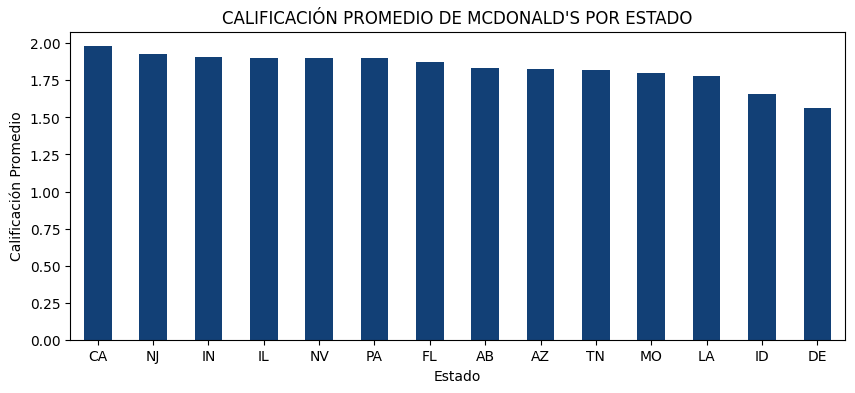

In [35]:
plt.figure(figsize=(10, 4))

calificacion_por_estado.plot(kind='bar', color='#124076')

plt.title('CALIFICACIÓN PROMEDIO DE MCDONALD\'S POR ESTADO')

plt.xlabel('Estado')
plt.ylabel('Calificación Promedio')

plt.xticks(rotation=0)

plt.show()

> *En la visualización de la distribución de calificaciones por estado, se observa que la calificación promedio se sitúa en torno a las 1.5 y 2.0 estrellas en todos los estados analizados. Esto sugiere que, independientemente del estado, los negocios tienden a recibir calificaciones relativamente bajas en general. Es necesario indagar más acerca de las razones detras de estas calificaciones.*

***Top 5 ciudades con mayor calificación promedio:***

*Averiguamos la calificación promedio por ciudad, nos quedamos con las cinco con mayor calificación:*

In [36]:
calificacion_por_ciudad = df_business_mc.groupby('city')['stars'].mean().sort_values(ascending=False).head()

*Graficamos:*

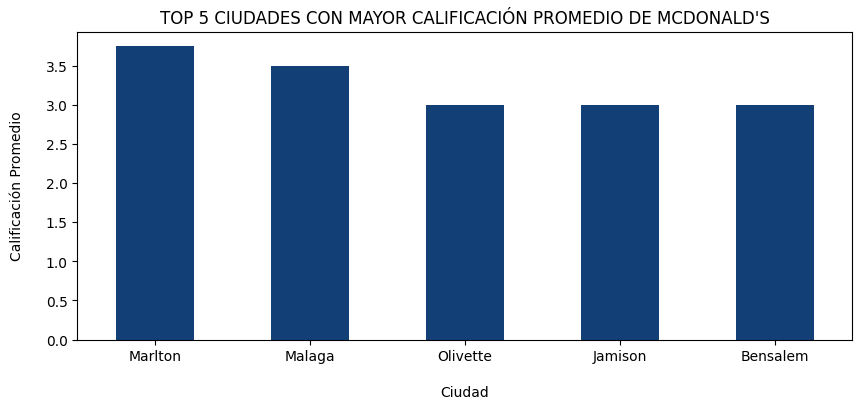

In [37]:
plt.figure(figsize=(10, 4))

calificacion_por_ciudad.plot.bar(color='#124076')

plt.title('TOP 5 CIUDADES CON MAYOR CALIFICACIÓN PROMEDIO DE MCDONALD\'S')

plt.xlabel('\nCiudad')
plt.ylabel('Calificación Promedio\n')

plt.xticks(rotation=0)

plt.show()

> *Al analizar las calificaciones por ciudad, observamos que Marlton lidera con una calificación de 3.75, seguida de cerca por Malaga con 3.50. Por otro lado, varias ciudades como Olivette, Jamison y Bensalem tienen una calificación promedio de 3.00. Estos datos sugieren que Marlton y Malaga pueden tener un mayor nivel de satisfacción entre los clientes en comparación con otras ciudades. Se las podria tomar como referencia para elevar el promedio de calificaciones en el resto de las ciudades.*

***Top 5 sucursales de McDonald's con mejor calificación:***

*Obtenemos las cinco sucursales con mejor calificación:*

In [38]:
top_5_sucursales = df_business_mc.nlargest(5, 'stars')

*Graficamos:*

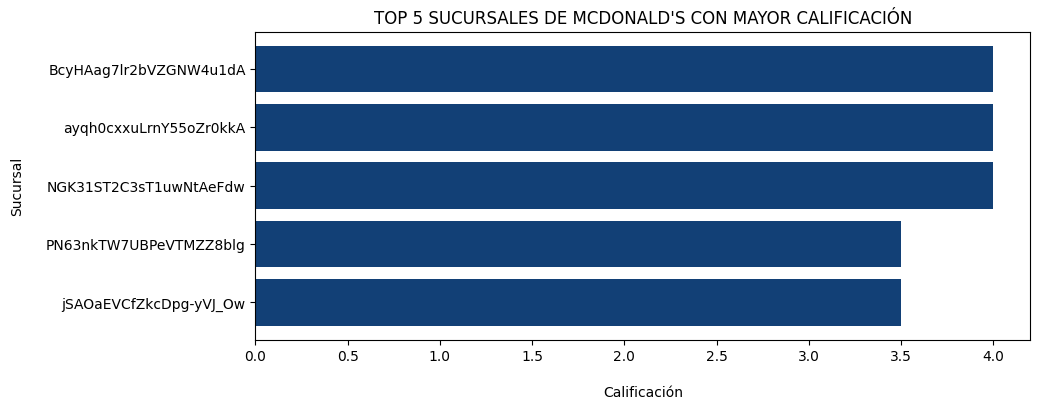

In [37]:
plt.figure(figsize=(10, 4))

plt.barh(top_5_sucursales['business_id'], top_5_sucursales['stars'], color='#124076')

plt.title('TOP 5 SUCURSALES DE MCDONALD\'S CON MAYOR CALIFICACIÓN')

plt.xlabel('\nCalificación')
plt.ylabel('Sucursal\n')

plt.xticks(rotation=0)

plt.gca().invert_yaxis()

plt.show()

*Verificamos en que ciudad y en que estado se encuentran esas sucursales con mejor calificación:*

In [39]:
for index, row in top_5_sucursales.iterrows():
    print(f"Sucursal ID: {row['business_id']}, Calificación: {row['stars']}, Ciudad: {row['city']}, Estado: {row['state']}")

Sucursal ID: BcyHAag7lr2bVZGNW4u1dA, Calificación: 4.0, Ciudad: Marlton, Estado: NJ
Sucursal ID: ayqh0cxxuLrnY55oZr0kkA, Calificación: 4.0, Ciudad: Edmonton, Estado: PA
Sucursal ID: NGK31ST2C3sT1uwNtAeFdw, Calificación: 4.0, Ciudad: Bensalem, Estado: IL
Sucursal ID: PN63nkTW7UBPeVTMZZ8blg, Calificación: 3.5, Ciudad: Malaga, Estado: NJ
Sucursal ID: jSAOaEVCfZkcDpg-yVJ_Ow, Calificación: 3.5, Ciudad: Exton, Estado: MO


> *Después de revisar las cinco sucursales de McDonald's con las mejores calificaciones, podemos observar que estas sucursales tienen calificaciones que van desde 3.5 hasta 4.0 estrellas. Esto sugiere que estas sucursales específicas están proporcionando un servicio y experiencia satisfactorios para sus clientes, lo que puede ser indicativo de una gestión efectiva y una atención al cliente de alta calidad en esas ubicaciones. Sin embargo, sería útil realizar un análisis más detallado para comprender mejor los factores que contribuyen a estas calificaciones superiores y cómo pueden replicarse en otras sucursales.*

***Cantidad de sucursales de McDonald's por calificación:***

*Analizamos la cantidad de sucursales de McDonald's según calificación:*

In [40]:
stars_mc = df_business_mc['stars'].value_counts().sort_values(ascending= False)

*Graficamos:*

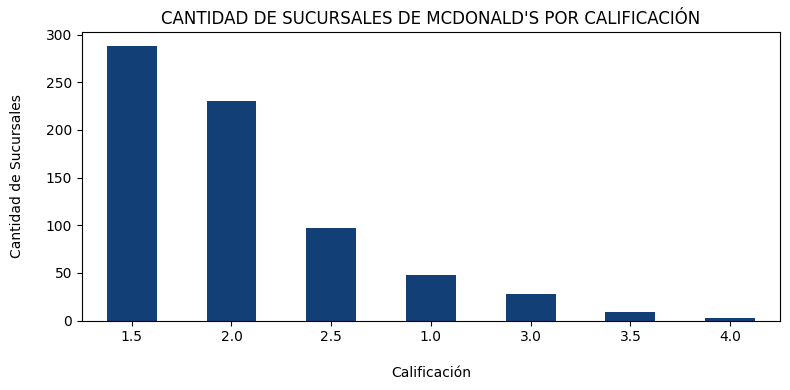

In [41]:
plt.figure(figsize=(8, 4))

stars_mc.plot(kind='bar', color='#124076')

plt.title('CANTIDAD DE SUCURSALES DE MCDONALD\'S POR CALIFICACIÓN')

plt.xlabel('\nCalificación')
plt.ylabel('Cantidad de Sucursales\n')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

> *En elanálisis inicial de las calificaciones de las sucursales, se destaca que ninguna sucursal tiene una calificación de 5 estrellas, ni tampoco de 4.5. Esto sugiere que las sucursales de McDonald's en el conjunto de datos no han recibido calificaciones muy altas. Además, se observa que la mayor parte de las sucursales tienen una calificación de 1.5 estrellas, seguida por más de 200 sucursales con una calificación de 2.0 estrellas. Esta distribución sugiere que la mayoría de las sucursales han recibido calificaciones bajas, lo que puede indicar problemas de calidad o insatisfacción entre los clientes. Sería interesante profundizar en las razones detrás de estas calificaciones y buscar áreas de mejora para las sucursales.*

***Reseñas vs Calificación de McDonald's:***

*Graficamos la relación entre la cantidad de reseñas y las calificaciónes de las sucursales:*

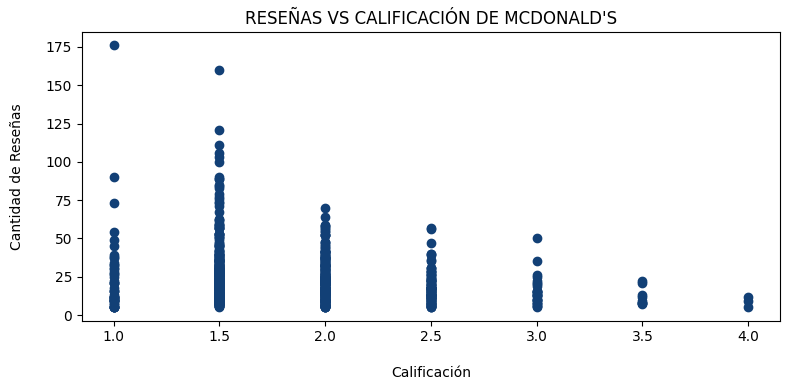

In [42]:
plt.figure(figsize=(8, 4))

plt.scatter(x=df_business_mc['stars'], y=df_business_mc['review_count'], color='#124076')

plt.title('RESEÑAS VS CALIFICACIÓN DE MCDONALD\'S')

plt.xlabel('\nCalificación')
plt.ylabel('Cantidad de Reseñas\n')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

> *Observamos que, en general, las sucursales con calificaciones más bajas tienden a tener mayor cantidad de reseñas, lo que sugiere una mayor participación de clientes disconformes o insatisfechos, en comparación con los clientes satisfechos con el servicio, la atención, etc.*

***Porcentaje de sucursales abiertas vs cerradas:***

*Obtenemos la cantidad de sucursales abiertas vs. sucursales cerradas:*

In [43]:
is_open = df_business_mc['is_open'].value_counts()

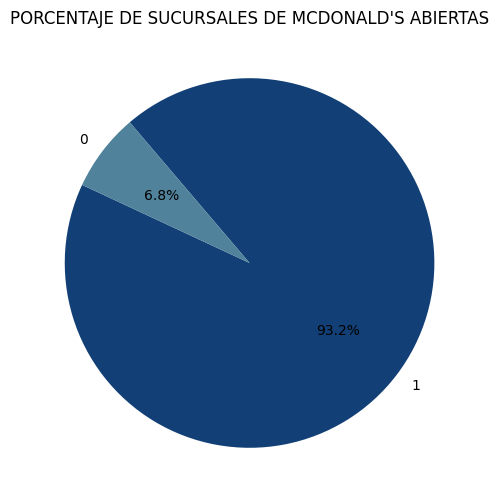

In [44]:
plt.figure(figsize=(6, 6))

plt.pie(is_open.values, labels=is_open.index, autopct='%1.1f%%', startangle=155, colors=['#124076', '#51829B'])

plt.title('PORCENTAJE DE SUCURSALES DE MCDONALD\'S ABIERTAS')

plt.show()

`Referencias:`
- 0: Cerrado
- 1: Abierto


> *Se observa que aproximadamente el 93.2% de las sucursales están abiertas, lo que indica que la gran mayoría de las sucursales se encuentran operando. Esto sugiere una presencia estable y continua de la cadena en el mercado, con un bajo porcentaje de sucursales cerradas en comparación.*

### Tip 📊

*Dataset que contiene información acerca de Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.*

*Definimos la ruta del archivo :*

In [45]:
ruta = './Datos/Yelp/tip.json' 

*Almacenamos el contenido del archivo en un DataFrame:*

In [46]:
df_tip = pd.read_json(ruta, lines=True)

*Visualizamos la estructura del DataFrame:*

In [47]:
df_tip.head(2)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


*Guardamos el archivo en formato **.parquet**:*

In [48]:
df_tip.to_parquet('./Datos/Yelp/tip.parquet')

*Y lo volvemos a abrir, pero en formato **.parquet**:*

In [49]:
df_tip = pd.read_parquet('./Datos/Yelp/tip.parquet')

*Visualizamos la información general del DataFrame, para ver el nombre de las columnas, la cantidad de valores **non-null** y los tipos de datos de los elementos de cada columna:*

In [50]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


*Verificamos el porcentaje de valores nulos:*

In [51]:
ut.porcentaje_valores_nulos(df_tip)

La columna user_id tiene un  0.00 % de valores nulos
La columna business_id tiene un  0.00 % de valores nulos
La columna text tiene un  0.00 % de valores nulos
La columna date tiene un  0.00 % de valores nulos
La columna compliment_count tiene un  0.00 % de valores nulos


> *Podemos ver que ninguna columna posee valores nulos.*

*Analizamos las estadisticas descriptivas de todo el DataFrame, tanto variables numericas como variables categoricas, y veremos que información relevante podemos obtener a partir de allí:*

In [52]:
df_tip.describe(include='all')

,user_id,business_id,text,date,compliment_count
count,908915,908915,908915,908915,908915.000000
unique,301758,106193,851033,NaN,NaN
top,fCvMnJU1Z-XhAjKg99wK3Q,FEXhWNCMkv22qG04E83Qjg,Great food,NaN,NaN
freq,4071,2571,598,NaN,NaN
mean,NaN,NaN,NaN,2015-06-14 10:13:53.302817280,0.012525
min,NaN,NaN,NaN,2009-04-16 13:11:49,0.000000
25%,NaN,NaN,NaN,2013-01-26 01:18:02.500000,0.000000
50%,NaN,NaN,NaN,2015-03-15 01:10:25,0.000000
75%,NaN,NaN,NaN,2017-08-02 06:19:55.500000,0.000000
max,NaN,NaN,NaN,2022-01-19 20:38:55,6.000000


> *A partir de este resumen estadistico podemos concluir que la frase en las reseñas (tips) más frecuente es "Great food", lo que sugiere que los usuarios valoran la calidad de la comida, se puede identificar que el usuario más activo en la plataforma es aquel con ID fCvMnJU1Z-XhAjKg99wK3Q, realizando multiples reseñas a lo largo del tiempo. Podemos identificar el ID del comercio que mayor cantidad de reseñas recibio a traves de esta plataforma, es aquel de ID FEXhWNCMkv22qG04E83Qjg y podemos ver que el dataset contiene información de las reseñas del periodo comprendido entre 2009-04-16 y 2022-01-19.*

***Top 5 usuarios más activos:***

*Obtenemos el top 5 de usuarios con mayor participación en la plataforma:*

In [53]:
top_5_usuarios = df_tip['user_id'].value_counts().head()

*Graficamos:*

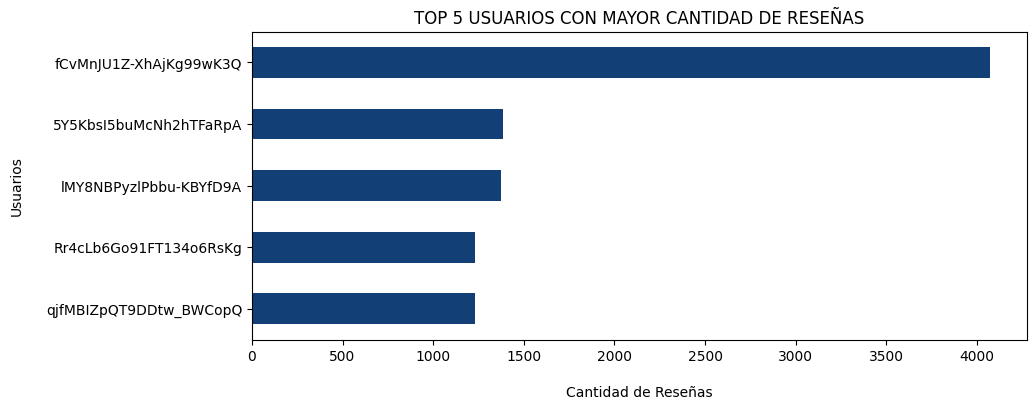

In [54]:
plt.figure(figsize=(10, 4))

top_5_usuarios.plot.barh(color='#124076')

plt.title('TOP 5 USUARIOS CON MAYOR CANTIDAD DE RESEÑAS')

plt.xlabel('\nCantidad de Reseñas')
plt.ylabel('Usuarios\n')

plt.xticks(rotation=0)

plt.gca().invert_yaxis()

plt.show()

> *A partir de este gráfico, podemos identificar a los usuarios con mayor actividad en la plataforma. Se observa que el usuario con ID "fCvMnJU1Z-XhAjKg99wK3Q" es el más activo, con un total de 4071 reseñas. Le siguen los usuarios "5Y5KbsI5buMcNh2hTFaRpA" y "lMY8NBPyzlPbbu-KBYfD9A" con 1385 y 1373 reseñas respectivamente. Esta información sugiere que algunos usuarios son mucho más activos que otros en la plataforma de reseñas. Es importante tener en cuenta la influencia de estos usuarios en la percepción general de los negocios debido a su actividad destacada en la plataforma.*

***Top 5 comercios con mayor cantidad de reseñas:***

*Obtenemos el top 5 de comercios con mayor cantidad de reseñas recibidas:*

In [55]:
top_5_comercios = df_tip['business_id'].value_counts().head()

*Graficamos:*

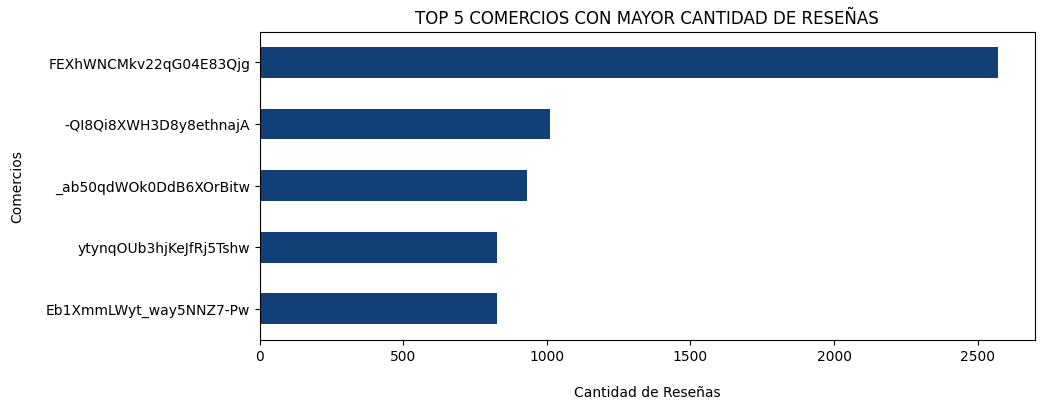

In [56]:
plt.figure(figsize=(10, 4))

top_5_comercios.plot.barh(color='#124076')

plt.title('TOP 5 COMERCIOS CON MAYOR CANTIDAD DE RESEÑAS')

plt.xlabel('\nCantidad de Reseñas')
plt.ylabel('Comercios\n')

plt.xticks(rotation=0)

plt.gca().invert_yaxis()

plt.show()

*Averiguamos el nombre del comercio, según su ID, a partir del dataset "Business" y analizamos su calificación:*

In [58]:
df_business[df_business['business_id'].isin(top_5_comercios.index)][['business_id', 'name', 'stars']]

,business_id,name,stars
33534,FEXhWNCMkv22qG04E83Qjg,Café Du Monde,4.0
46923,-QI8Qi8XWH3D8y8ethnajA,Philadelphia International Airport - PHL,2.5
95286,Eb1XmmLWyt_way5NNZ7-Pw,Louis Armstrong New Orleans International Airp...,3.0
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,4.0
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,4.5


> *Es interesante notar que los comercios con mayor cantidad de reseñas recibidas tienen una calificación alta, superior a la mediana (2.5). Esto sugiere que los clientes que frecuentan estos comercios tienden a estar satisfechos con su experiencia y están dispuestos a dejar reseñas positivas en la plataforma.*

***Frases más frecuentes en las reseñas:***

*Analizamos cuales son las frases que más se repiten dentro de las reseñas:*

In [59]:
df_tip['text'].value_counts().head(10)

text
Great food          598
Now open.           533
Love this place!    477
Great food!         433
.                   421
Love this place     398
Yum                 379
Closed              373
Awesome             371
Good                370
Name: count, dtype: int64

> *Podemos observar que las frases más repetidas en las reseñas son principalmente positivas o neutrales. Esto sugiere que los clientes que dejan reseñas tienden a tener una experiencia generalmente favorable o al menos no negativa en estos comercios.*

***Tendencia de interacción por año:***

*Creamos un DataFrame auxiliar, donde obtendremos solamente el año de la columna "date", y agruparemos la cantidad de reseñas por año:*

In [60]:
df_agrupado_año = pd.DataFrame(df_tip['date'].apply(lambda x: x.strftime('%Y')).value_counts().sort_index())

*Graficamos:*

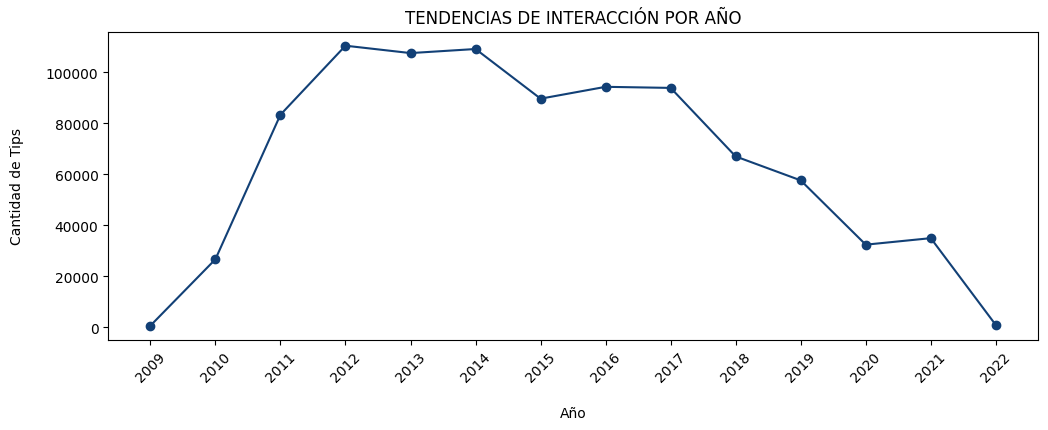

In [61]:
plt.figure(figsize=(12, 4))

plt.plot(df_agrupado_año.index, df_agrupado_año.values, color='#124076', marker= 'o')

plt.title('TENDENCIAS DE INTERACCIÓN POR AÑO')

plt.xlabel('\nAño')
plt.ylabel('Cantidad de Tips\n')

plt.xticks(rotation=45)

plt.show()

> *Obseravamos que hubo un aumento en la interacción de los usuarios entre 2009 y 2012, seguido de un período de relativa estabilidad entre 2012 y 2014, con un alto número de reseñas realizadas. Sin embargo, desde 2014 en adelante, la interacción de los usuarios en la plataforma ha estado disminuyendo. Este patrón podría indicar cambios en el comportamiento de los usuarios o en la popularidad de la plataforma a lo largo del tiempo.*

***Tendencia de interacción por mes:***

*Creamos un DataFrame auxiliar, donde obtendremos solamente el mes de la columna "date", y agruparemos la cantidad de reseñas por mes:*

In [62]:
df_agrupado_mes = pd.DataFrame(df_tip['date'].apply(lambda x: x.strftime('%m')).value_counts().sort_index())

*Graficamos:*

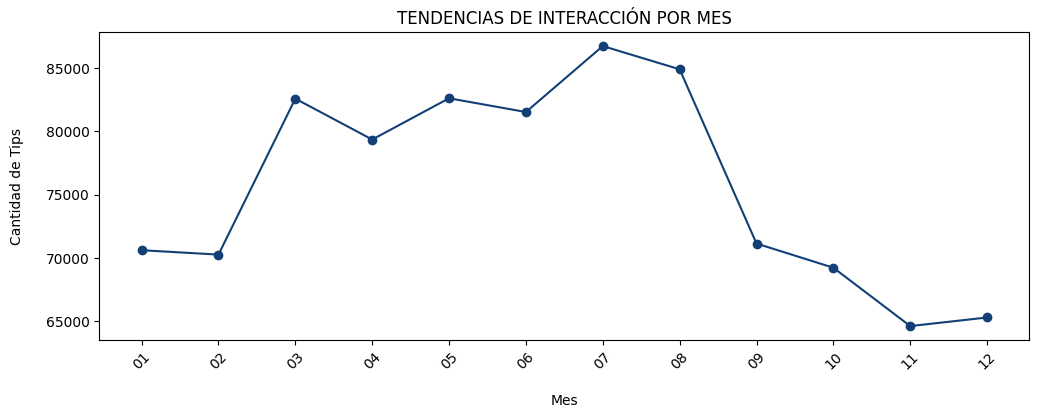

In [63]:
plt.figure(figsize=(12,4))

plt.plot(df_agrupado_mes.index, df_agrupado_mes.values, color='#124076', marker= 'o')

plt.title('TENDENCIAS DE INTERACCIÓN POR MES')

plt.xlabel('\nMes')
plt.ylabel('Cantidad de Tips\n')

plt.xticks(rotation=45)

plt.show()

> *Notamos que noviembre y diciembre fueron los meses con menos interacción en el período analizado, mientras que julio y agosto destacaron como los meses con mayor cantidad de reseñas realizadas. Esto podría deberse a diversos factores estacionales, como vacaciones, festividades o cambios en el comportamiento de los usuarios durante diferentes períodos del año.*

*Analizamos las reseñas realizadas hacia el comercio de nuestro interes, McDonald's:*

In [64]:
mcdonalds = df_tip[df_tip['business_id'].isin(df_business_mc['business_id'])]

***Top 5 sucursales de McDonald's con mayor cantidad de reseñas:***

*Averiguamos cuales son las 5 sucursales con mayor cantidad de reseñas recibidas:*

In [67]:
top_5_mc = mcdonalds['business_id'].value_counts().head()

*Graficamos:*

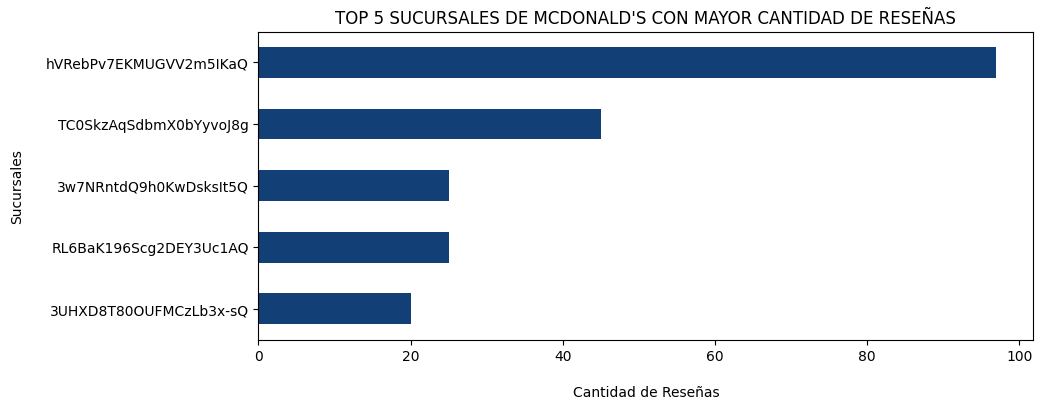

In [69]:
plt.figure(figsize= (10, 4))

top_5_mc.plot.barh(color='#124076')

plt.title('TOP 5 SUCURSALES DE MCDONALD\'S CON MAYOR CANTIDAD DE RESEÑAS')

plt.xlabel('\nCantidad de Reseñas')
plt.ylabel('Sucursales\n')

plt.xticks(rotation=0)

plt.gca().invert_yaxis()

plt.show()

*Averiguamos en que ciudad y estado, se encuentran esas sucursales con mayor cantidad de reseñas:*

In [74]:
for index, row in df_business.iterrows():
    if row['business_id'] in top_5_mc.index:
        print(f"Sucursal ID: {row['business_id']}, Nombre: {row['name']}, Ciudad: {row['city']}, Estado: {row['state']}, Calificación: {row['stars']}")

Sucursal ID: 3w7NRntdQ9h0KwDsksIt5Q, Nombre: McDonald's, Ciudad: Tucson, Estado: PA, Calificación: 2.0
Sucursal ID: TC0SkzAqSdbmX0bYyvoJ8g, Nombre: McDonald's, Ciudad: Philadelphia, Estado: IN, Calificación: 1.5
Sucursal ID: hVRebPv7EKMUGVV2m5IKaQ, Nombre: McDonald's, Ciudad: Philadelphia, Estado: NV, Calificación: 1.5
Sucursal ID: 3UHXD8T80OUFMCzLb3x-sQ, Nombre: McDonald's, Ciudad: New Orleans, Estado: MO, Calificación: 1.0
Sucursal ID: RL6BaK196Scg2DEY3Uc1AQ, Nombre: McDonald's, Ciudad: Indianapolis, Estado: FL, Calificación: 1.5


> *Podemos concluir que las sucursales con mayor cantidad de reseñas, tienden a tener calificaciones en su mayoría bajas. Esto sugiere que, a pesar de las críticas negativas, estas sucursales siguen generando un alto nivel de interacción por parte de los usuarios. Sería interesante profundizar en las razones detrás de estas críticas y la persistente interacción de los usuarios con estas sucursales.*

***Tendencia de interacción por año hacia sucursales de McDonald's:***

*Creamos un DataFrame auxiliar, donde obtendremos solamente el año de la columna "date", y agruparemos la cantidad de reseñas por año hacia nuestras sucursales de McDonald's:*

In [75]:
df_agrupado_año = pd.DataFrame(mcdonalds['date'].apply(lambda x: x.strftime('%Y')).value_counts().sort_index())

*Graficamos:*

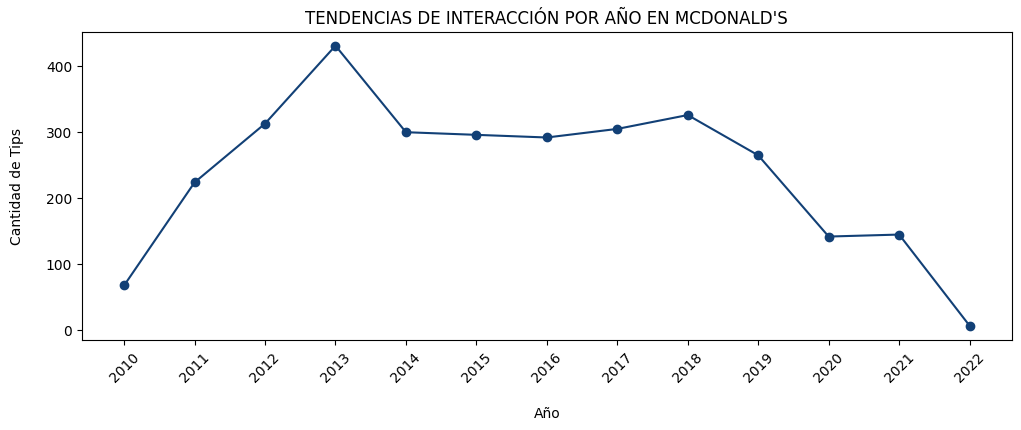

In [77]:
plt.figure(figsize=(12, 4))

plt.plot(df_agrupado_año.index, df_agrupado_año.values, color='#124076', marker= 'o')

plt.title('TENDENCIAS DE INTERACCIÓN POR AÑO EN MCDONALD\'S')

plt.xlabel('\nAño')
plt.ylabel('Cantidad de Tips\n')

plt.xticks(rotation=45)

plt.show()

> *Después de analizar las interacciones a lo largo de los años hacia las sucursales de McDonald's, se puede concluir que la tendencia de interacción sigue un patrón similar al observado en las interacciones hacia todos los restaurantes en la plataforma. Esto sugiere que la popularidad de la plataforma en sí misma puede ser un factor determinante en la cantidad de interacciones registradas, más que la popularidad específica de un negocio en particular.*

***Frases más frecuentes en las reseñas hacia McDonald's:***

In [78]:
mcdonalds['text'].value_counts().head(10)

text
Breakfast                                                                                                                                                                                                                                          37
Ok                                                                                                                                                                                                                                                  9
Coffee                                                                                                                                                                                                                                              6
Coffee!                                                                                                                                                                                                                                             6
Very good h

> *Podemos observar que las frases más repetidas en las reseñas son principalmente positivas o neutrales. Esto sugiere que los clientes que dejan reseñas tienden a tener una experiencia generalmente favorable o al menos no negativa en las sucursales de McDonald's.*

### Review 📊

*Definimos la ruta del archivo :*

In [225]:
ruta = './Datos/Yelp/review.json' 

*Creamos un función que lea el archivo en formato **.json** en fragmentos de 10000 y lo almacene en una lista vacia. Concatenamos los frangmentos de DataFrame en uno solo y guardamos el archivo en formato **.parquet** para que su peso sea menor:*

In [226]:
# Lista vacia para almacenar los fragmentos del DataFrame
dataframes = []

# Tamaño de los fragmentos
tamano_fragmento = 10000

# Leemos el archivo en fragmentos y creamos DataFrames
with open(ruta, 'r') as file:
    for chunk in pd.read_json(file, lines=True, chunksize=tamano_fragmento):
        dataframes.append(chunk)

# Concatenamos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Guardamos el DataFrame en formato Parquet para que su peso sea menor
df_final.to_parquet('review_temporal.parquet')


*Almacenamos el contenido del archivo en un DataFrame:*

In [ ]:
df_reviews = pd.read_parquet('review_temporal.parquet')

*Visualizamos la estructura del DataFrame:*

In [ ]:
df_reviews.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


*Normalizamos los nombres de las columnas del DataFrame:*

In [ ]:
ut.normalizacion_columnas(df_reviews)

,Review_Id,User_Id,Business_Id,Stars,Useful,Funny,Cool,Text,Date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


*Uniremos los DataFrames, **mcdonalds** y **df_reviews**, para quedarnos solo con las reseñas del comercio de nuestro interes:*

In [ ]:
reviews_mcdonalds = mcdonalds.merge(df_reviews, on= 'Business_Id', how= 'left')

*Verificamos:*

In [ ]:
reviews_mcdonalds.head(2)

,Name,Business_Id,Review_Id,User_Id,Stars,Useful,Funny,Cool,Text,Date
0,McDonald's,yM8LlTInbQH4FwWC97lz6w,SB8GmxCcWLkz5hnArAWDyg,6z3PRqgD0ZRzo3JWA2XGiQ,1,0,0,0,If you can't come to work with pride and energ...,2018-01-09 21:23:02
1,McDonald's,yM8LlTInbQH4FwWC97lz6w,F99EHFlmHnt3U6wSdM2KoA,bQ_qlqlZRFgfRlqveB-ILg,2,2,2,0,Not the greatest fast food place to hit at nig...,2010-11-24 21:44:42


*Eliminaremos la columna **Business_Id**, por que no es relevante, ya que ahora tenemos el nombre del comercio:*

In [ ]:
reviews_mcdonalds.drop(columns=['Business_Id'], inplace=True)

*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
reviews_mcdonalds.to_parquet('./Datos/Archivos Filtrados/reviews_mcdonalds.parquet')

### User 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Yelp/user.parquet'

*Almacenamos el contenido del archivo en una variable, **df_user**:*

In [ ]:
df_user = pq.read_table(ruta, use_threads=True)

*Lo convertimos a un DataFrame de pandas:*

In [ ]:
df_user = df_user.to_pandas()

*Visualizamos la estructura del DataFrame:*

In [ ]:
df_user.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


In [ ]:
df_user.columns

Index(['User_Id', 'Name', 'Review_Count', 'Yelping_Since', 'Useful', 'Funny',
       'Cool', 'Elite', 'Friends', 'Fans', 'Average_Stars', 'Compliment_Hot',
       'Compliment_More', 'Compliment_Profile', 'Compliment_Cute',
       'Compliment_List', 'Compliment_Note', 'Compliment_Plain',
       'Compliment_Cool', 'Compliment_Funny', 'Compliment_Writer',
       'Compliment_Photos'],
      dtype='object')

*Normalizamos los nombres de las columnas del DataFrame:*

In [ ]:
ut.normalizacion_columnas(df_user).head(2)

,User_Id,Name,Review_Count,Yelping_Since,Useful,Funny,Cool,Elite,Friends,Fans,...,Compliment_More,Compliment_Profile,Compliment_Cute,Compliment_List,Compliment_Note,Compliment_Plain,Compliment_Cool,Compliment_Funny,Compliment_Writer,Compliment_Photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
reviews_mcdonalds.to_parquet('./Datos/Archivos Filtrados/df_user.parquet')

### Metadatos Sitios 📊

*Definimos la ruta del archivo :*

In [ ]:
ruta = './Datos/Google Maps/metadata-sitios'

*Leemos los archivos **.json** de la carpeta **metadatos-sitios** , los filtramos quedandonos con aquellos registros cuyo **name** contenga **McDonald** en el nombre del comercio y los unimos, conteniendolos en un DataFrame. Convertimos el DataFrame en un archivo compatible con parquet, y lo guardamos de manera local para su posterior uso:*

In [ ]:
#Generamos una lista vacia donde almacenaremos los DataFrames
dfs = []

#Iteramos sobre los archivos del directorio
for filename in os.listdir(ruta):

    #Si el archivo es un JSON, lo leemos y filtramos los registros que contengan la palabra McDonald's
    if filename.endswith('.json'):
        filepath = os.path.join(ruta, filename)
        df = pd.read_json(filepath, lines=True)
        df_filtered = df[df['name'].str.contains(r"\bMcDonald's\b|\bMc Donald's\b", case=False, na=False, regex=True)]
        dfs.append(df_filtered)

#Si se encontraron DataFrames, los concatenamos y guardamos el resultado en formato Parquet
if len(dfs) > 0:
    merged_df = pd.concat(dfs)
    merged_df.reset_index(drop=True, inplace=True)

    # Guardamos el DataFrame en formato Parquet
    merged_df.to_parquet('/Datos/metadatos-sitios-temporal.parquet')
    
else:
    print("No se encontraron archivos JSON en el directorio que cumplieran con la condición.")



*Leemos el archivo generado anteriormente y lo almacenamos en un DataFrame para proceder con las transformaciones del mismo:*

In [ ]:
df_sitios = pd.read_parquet('./Datos/metadatos-sitios-temporal.parquet')

*Normalizamos los nombres de las columnas del mismo:*

In [ ]:
ut.normalizacion_columnas(df_sitios).head(2)

,Name,Address,Gmap_Id,Description,Latitude,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
0,McDonald's,"McDonald's, 1205 S Main St, Manteca, CA 95336",0x80904101ce001281:0x76db23c5d22346ae,"Classic, long-running fast-food chain known fo...",37.785995,-121.218062,Fast food restaurant Breakfast restaurant Coff...,2.4,48,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8090410018dc2657:0xed7a807ae3eeee6d, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
1,McDonald's,"McDonald's, 1000 Palisades Center Dr, West Nya...",0x89c2e9cf8e139235:0x24bfb20e9e09f260,"Classic, long-running fast-food chain known fo...",41.097768,-73.955392,Fast food restaurant Breakfast restaurant Coff...,2.2,18,$,None,{'Accessibility': ['Wheelchair accessible rest...,None,"[0x89c2e9e6ef010ddb:0xe923f7207b70d6f9, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


*Verificamos los valores unicos en la columna **Name** y podemos ver que hay otros comercios que incluyen el nombre Mc Donald's, pero también hay comercios que son los corrrectos, los de nuestro interes, pero contienen cierta descripción o datos de la ubicación en su nombre, por lo que vamos a buscar la forma de filtrarlos:*

In [ ]:
df_sitios['Name'].unique()

array(["McDonald's", "McDonald's Studio", "McDonald's Lunch",
       "Mc Donald's Towing of Paw Paw", "Mc Donald's",
       "McDonald's OMG Building", "McDonald's Corporate Office.",
       "Norman McDonald's Country Drive-In",
       "McDonald's Warehouse Corporate office", "McDonald's Cafe & BBQ",
       "Mcdonald's Self Storage", "McDonald's Budget Printing",
       "Peninsula McDonald's Office", "Mc Donald's Kennels",
       "Graviss McDonald's Disc Golf Course", "Mcdonald's Playplace",
       "McDonald's Regional Office", "Mc Donald's RV Park & Car Wash",
       "McDonald's Kennel",
       "Martin Brower L.L.C/McDonald's Distribution Center",
       "Mc Donald's on church ave", "McDonald's - Corporate Office",
       "Mcdonald's Play Area", "Mc Donald's Service Station",
       "Bluemound Rd. at McDonald's",
       "Cabin in the Clouds Christmas Forest (Formerly McDonald's Tree Farm)",
       "McDonald's Transmission Repair", "McDonald's / Ross's",
       "McDonald's HVAC", "McDon

*Podemos ver que los elementos contenidos en nuestra columna **Category**, se encuentran en forma de lista. Procederemos a transformarlos para poder realizar las transformaciones necesarias en esa columna:*

In [ ]:
df_sitios['Category'].value_counts()

Category
[Fast food restaurant]                                                                                                                    32
[Corporate office]                                                                                                                        11
[Restaurant]                                                                                                                              10
[Dessert shop]                                                                                                                             5
[Bus stop]                                                                                                                                 2
                                                                                                                                          ..
[Fast food restaurant, Breakfast restaurant, Coffee shop, Hamburger restaurant, Restaurant, Sandwich shop]                                 1
[Fas

*Primero, cambiamos el tipo de dato a **str**:*

In [ ]:
df_sitios['Category'] = df_sitios['Category'].astype(str)

*Luego, recorremos cada elemento de la columna, y eliminamos los corchetes y las comillas simples:*

In [ ]:
df_sitios['Category'] = df_sitios['Category'].apply(lambda x: x.replace('[','').replace(']','').replace('\'',''))

*Verificamos:*

In [ ]:
df_sitios.head(2)

,Name,Address,Gmap_Id,Description,Latitude,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
0,McDonald's,"McDonald's, 1205 S Main St, Manteca, CA 95336",0x80904101ce001281:0x76db23c5d22346ae,"Classic, long-running fast-food chain known fo...",37.785995,-121.218062,Fast food restaurant Breakfast restaurant Coff...,2.4,48,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8090410018dc2657:0xed7a807ae3eeee6d, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
1,McDonald's,"McDonald's, 1000 Palisades Center Dr, West Nya...",0x89c2e9cf8e139235:0x24bfb20e9e09f260,"Classic, long-running fast-food chain known fo...",41.097768,-73.955392,Fast food restaurant Breakfast restaurant Coff...,2.2,18,$,None,{'Accessibility': ['Wheelchair accessible rest...,None,"[0x89c2e9e6ef010ddb:0xe923f7207b70d6f9, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


*Filtramos el DataFrame, quedandonos con aquellos registros que poseen las palabras "Restaurant", "restaurant", "Fast food" y/o "fast-food" en los elementos de la columna **Category**:*

In [ ]:
df_sitios_ = df_sitios[df_sitios['Category'].str.contains('restaurant|Fast food|Restaurant|fast-food')]

*Guardamos el DataFrame resultante para su posterior uso:*

In [ ]:
df_sitios_.to_parquet('./Datos/Archivos Filtrados/metadatos_mcdonalds.parquet')

*Analizamos aquellos que no contienen ninguno de los juegos de palabras anteriores:*

In [ ]:
df_sitios[~df_sitios['Category'].str.contains('restaurant|Fast food|Restaurant|fast-food')].head(2)

,Name,Address,Gmap_Id,Description,Latitude,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
24,McDonald's Studio,"McDonald's Studio, 141 Bridge Ave E, Delano, M...",0x52b4a9af2ca9aa29:0x20efe9b9990af8b3,None,45.041810,-93.788087,Portrait studio,4.9,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x52b4a9105e951a1d:0x1ac4d8fb0264249d, 0x52b4...",https://www.google.com/maps/place//data=!4m2!3...
28,Mc Donald's Towing of Paw Paw,"Mc Donald's Towing of Paw Paw, 39617 W Red Arr...",0x881741d71056f773:0xde1e96ed0a460024,None,42.211307,-85.933143,Towing service Auto wrecker,3.2,8,None,None,None,None,"[0x88176a4b799092ed:0x10fc20d91d5ecfc9, 0x8817...",https://www.google.com/maps/place//data=!4m2!3...


*Podemos ver claramente, que corresponden a otras categorias totalmente distintas y no pertenecen a la cadena de comidas rapidas de nuestro interes.*

### review-Florida 📊

In [ ]:
ruta = './Datos/Google Maps/reviews-estados/review-Florida'

*Leemos los archivos **.json** de la carpeta **review-Florida**. Convertimos el DataFrame en un archivo compatible con parquet, y lo guardamos de manera local para su posterior uso:*

In [ ]:
#Generamos una lista vacia donde almacenaremos los DataFrames
dfs = []

#Iteramos sobre los archivos del directorio
for filename in os.listdir(ruta):

    #Si el archivo es un JSON, lo leemos y lo almacenamos en la lista
    if filename.endswith('.json'):
        filepath = os.path.join(ruta, filename)
        df = pd.read_json(filepath, lines=True)
        dfs.append(df)

#Si se encontraron DataFrames, los concatenamos y guardamos el resultado en formato Parquet
if len(dfs) > 0:
    merged_df = pd.concat(dfs)
    merged_df.reset_index(drop=True, inplace=True)

    #Guardamos el DataFrame en formato Parquet
    merged_df.to_parquet('./Datos/review-Florida-temporal.parquet')
    
else:
    print("No se encontraron archivos JSON en el directorio que cumplieran con la condición.")

*Leemos el archivo generado anteriormente y lo almacenamos en un DataFrame para proceder con las transformaciones del mismo:*

In [ ]:
df_florida = pd.read_parquet('./Datos/review-Florida-temporal.parquet')

*Normalizamos los nombres de las columnas del mismo:*

In [ ]:
df_florida = ut.normalizacion_columnas(df_florida)

In [141]:
df_florida

,User_Id,Name,Time,Rating,Text,Pics,Resp,Gmap_Id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
3,1.063444e+20,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
4,1.008751e+20,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
...,...,...,...,...,...,...,...,...
2849995,1.002877e+20,James Rudolph,1617305583696,5,None,None,"{'text': 'Thank you!', 'time': 1617561671234.0}",0x8890966585e36d3f:0x131d47c2c60a8d31
2849996,1.140989e+20,Vincent Alexander,1581817848416,3,None,None,None,0x8890966585e36d3f:0x131d47c2c60a8d31
2849997,1.123448e+20,Brett Owen,1551240010030,5,None,None,None,0x8890966585e36d3f:0x131d47c2c60a8d31
2849998,1.054465e+20,ashly kindle,1521152570004,5,None,None,"{'text': 'Thank you, Ashly', 'time': 151691419...",0x8890966585e36d3f:0x131d47c2c60a8d31


*Uniremos los DataFrames, **df_sitios_** y **df_florida**, para quedarnos solo con las reseñas del comercio de nuestro interes:*

In [142]:
reviews_florida = df_florida.merge(df_sitios, on= 'Gmap_Id')

In [145]:
reviews_florida.head(2)

,User_Id,Name_x,Time,Rating,Text,Pics,Resp,Gmap_Id,Name_y,Address,...,Longitude,Category,Avg_Rating,Num_Of_Reviews,Price,Hours,Misc,State,Relative_Results,Url
0,1.123131e+20,Crystal Pedraza,1609195591445,5,Good food good service,None,None,0x88e81ee8d1ae20e9:0xf34a362c6c772e99,McDonald's,"McDonald's, 13300 Cortez Blvd, Brooksville, FL...",...,-82.506031,Fast food restaurant Breakfast restaurant Coff...,2.2,38,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88e81eea3f689d27:0xade1e6e09892161, 0x88e81...",https://www.google.com/maps/place//data=!4m2!3...
1,1.122551e+20,Jessica Guiliano,1572482113768,1,I am here at 8:30 PM and the only thing my dau...,None,None,0x88e81ee8d1ae20e9:0xf34a362c6c772e99,McDonald's,"McDonald's, 13300 Cortez Blvd, Brooksville, FL...",...,-82.506031,Fast food restaurant Breakfast restaurant Coff...,2.2,38,$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88e81eea3f689d27:0xade1e6e09892161, 0x88e81...",https://www.google.com/maps/place//data=!4m2!3...


*Guardamos el DataFrame resultante para su posterior uso:*

In [154]:
df_sitios_.to_parquet('./Datos/Archivos Filtrados/reviews_florida_mcdonalds.parquet')